In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
Data = pd.read_csv("/content/heartdataset.csv")
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
Data.drop(['education'], axis=1, inplace=True)
Data.isnull().sum()

Data.dropna(axis = 0, inplace = True)
print(Data.shape[0])
Data.isnull().sum()

3749


,0
male,0
age,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0
sysBP,0


In [ ]:
Y = Data.TenYearCHD.values
X = Data.drop(['TenYearCHD'], axis = 1)

In [ ]:
sc= StandardScaler()
X = sc.fit_transform(X)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.T
Y_test = Y_test.T

print(X_train.shape)
print(Y_train.shape)
print(Y_test.shape)

(14, 2999)
(2999,)
(750,)


In [ ]:
###Initialize the weights and bias
def initialize_W_b_with_zeros(num_features):
    w = np.zeros(shape = (num_features,1))
    b = 0
    return w,b

In [18]:

def sigmoid(z):
    s = 1/(1+ np.exp(-z))

    return s

In [19]:
def propagate(w,b, X,Y):

    m = X.shape[1]
    z = np.dot(w.T, X) + b
    A = sigmoid(z)

    loss =  - (Y * np.log(A) + (1-Y) * np.log( 1-A) )
    cost=  np.sum(loss)/m

    dw = (1 / m) * np.dot(X, (A-Y).T)
    db = (1 / m) * np.sum(A-Y)

    gradient= {"dw": dw,
             "db": db}

    return gradient, cost

In [20]:
def update(w,b, X,Y, num_iterations, learning_rate):

    costs = []

    for i in range( num_iterations ):
        gradient, cost = propagate(w,b, X,Y)

        dw = gradient['dw']
        db = gradient['db']

        w = w - learning_rate * dw
        b = b - learning_rate * db

        if i % 20 == 0:
            costs.append(cost)

    parameters = {"w": w,
                 "b": b}

    gradient= {"dw": dw,
             "db": db}

    return parameters, gradient, costs

In [21]:
def predict( w,b,X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid( np.dot(w.T , X) + b)

    for i in range(A.shape[1]):
        if A[:,i] > 0.5 :
              Y_prediction[:,i] = 1

    return Y_prediction

In [22]:
def Logistic_Regression_model(X_train, X_test, Y_train, Y_test,num_iterations, learning_rate ):
    num_features = X_train.shape[0]
    w,b = initialize_W_b_with_zeros(num_features)
    parameters, gradient, costs = update(w,b, X_train,Y_train, num_iterations, learning_rate)

    w = parameters["w"]
    b = parameters["b"]

    Y_Test_Predict = predict(w,b, X_test)

    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_Test_Predict - Y_test)) * 100))


    Dictionary = {"Prediction ": Y_Test_Predict,
                "Weight": w,
                "Bias" :b,
                "Cost Function" : costs}

    return Dictionary

In [ ]:
Dictionary = Logistic_Regression_model(X_train, X_test, Y_train, Y_test, num_iterations = 1000, learning_rate = 0.10 )

test accuracy: 84.4 %


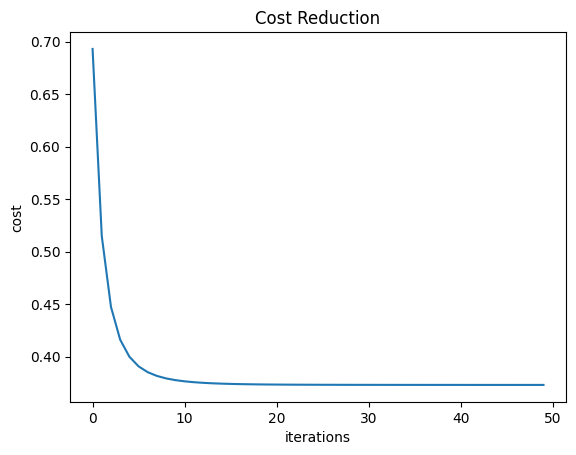

In [23]:
# Previous code...
# %%
# Initialize and run the logistic regression model
Dictionary = Logistic_Regression_model(X_train, X_test, Y_train, Y_test, num_iterations = 1000, learning_rate = 0.10 )

# %%
# Plot learning curve (with costs)
import matplotlib.pyplot as plt
costs = np.squeeze(Dictionary['Cost Function']) # Dictionary is now defined and accessible
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Cost Reduction")
plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train.T,Y_train.T)
print("test accuracy {}".format(lr.score(X_test.T,Y_test.T)))

test accuracy 0.844
